# Next Steps: Intermediate/Advanced Python

## Base Python
### Debugging

Programming in the real world is hard. Often there isn't just a right solution, and you may not even fully know what your problem is until you start trying to solve it. Chances are good you won't usually write code that works on the first, second, or even tenth try. Debugging is critical. 

The hardest part of debugging is finding your errors. So, a good approach to in-depth programming challenges is to write small chunks. Make sure it works. Add a little bit. Make sure that works. Repeat until done.

Some things to keep in mind as you debug:

1. It's probably not Python's fault. "Python isn't doing X right" is a terrible way to debug a program. Figure out what mistake you made.
2. Assumptions. Even if you think a line of your code is right, assume it isn't. I often use print statements to output variable state as I go, and to find errors.
3. Python gives error messages with line numbers! Use these to see what is causing the error. You'll be able to check the line in your code, as well as whatever external module your script called. This lets you drill into the documentation to find more details about, for example, what inputs are or are not acceptable for a given function.

Write test cases! The unittest module is perfect for this. To do this we need classes... 

In [28]:
import unittest

def pythagorean(a=0, b=0, c=0):
    if a**2 + b **2 == c**2:
        return True
    else:
        return False
    
class Pythagorean_Test(unittest.TestCase):
    def testRightTriange(self):
        self.assertTrue(pythagorean(a=3,b=4,c=5))
    def testBad(self):
        self.assertFalse(pythagorean(a=1,b=1,c=2))
#Normally only need to run unittest.main()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
        

..
----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


### Accumulator
When we take an initial value (like 0) and iterate through a list or other data structure, while updating the variable, this is accumulation. We accumulate information. What's nice about this is that often, we don't care what order we see the things we iterate through. So, as data scales to larger and larger levels, we can use a Map/Filter/Reduce paradigm to accomplish large computations efficiently.

### Map
`map` allows you to take a single function, and apply it easily to a bunch of elements of a list (or similar data structure).

### Filter
When you go through a list, and only want to keep some that satisfy some logical thing, you can use `filter` instead.

### Reduce
Reduce is stored in the `functools` module, and lets you basically accumulate through a list.

In [45]:
accum = 0
for x in [1,2,3,4,5,6,7]:
    accum = accum + x


In [80]:
def square(x):
    return x**2

a = map(square, [1, 2, 3, 4, 5])
c = list(a)
print(c)
b = filter(lambda x: x % 2 == 0, c)
print(list(b))


[1, 4, 9, 16, 25]
[4, 16]


In [82]:
from functools import reduce
def applyToAll(x):
    #filter portion
    newX = list(filter(lambda a: a > 0, x))
    func = lambda a, b: a * b
    return reduce(func, newX)

print(applyToAll([1, 2, 3, 4]))


24

### More advanced for loops

We get more advanced looping with tools like `enumerate`, `zip`, and list comprehensions

In [79]:
# Enumeration
print('ENUMERATION')
for count, item in enumerate(['a', 'b', 'c', 'd']):
    print(count, item)
    
print('\nZIP')
for a, b in zip([1, 2, 3, 4], ['a', 'b', 'c', 'd']):
    print(a, b)
    
print(list(zip([1, 2, 3, 4], ['a', 'b', 'c', 'd'])))

ENUMERATION
0 a
1 b
2 c
3 d

ZIP
1 a
2 b
3 c
4 d
[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]


### Objects and Equality
Python gives objects a unique identifier. There is a difference between how lists, strings, and tuples are treated.

In [44]:
a = "A string"
b = "A string"
print(a == b, a is b, id(a), id(b))
b = a
print(a == b, a is b, id(a), id(b))

a = [1, 2, 3]
b = [1, 2, 3]
print(a == b, a is b, id(a), id(b))
b = a
print(a == b, a is b, id(a), id(b))
b[0] = 5
print(a, b)
b = a[:]
print(a == b, a is b, id(a), id(b))

#Differences with append and +
print(b, id(b))
c = b+[4]
print(c, id(c))
b.append(4)
print(b, id(b))
a = b
a.append(5)
print(b)
a = b + [6]
print(a, b)

True False 4346224816 4481320624
True True 4346224816 4346224816
True False 4481303240 4481537416
True True 4481303240 4481303240
[5, 2, 3] [5, 2, 3]
True False 4481303240 4481537416
[5, 2, 3] 4481537416
[5, 2, 3, 4] 4481536072
[5, 2, 3, 4] 4481537416
[5, 2, 3, 4, 5]
[5, 2, 3, 4, 5, 6] [5, 2, 3, 4, 5]


## Python for Data Science
Pandas, numpy, scikit-learn, big data

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Overview
- pandas: Used for handling data frames easily, super helpful for importing data files, manipulating large quantities of data, and getting slices of data
- seaborn: Plays nicely with pandas for beautiful plots and visualizations

In [143]:
datasets = {'car_crashes': "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/car_crashes.csv",
           'flights': "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv",
            'mpg': "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv",
           'planets': "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv",
           'titanic': "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv",
           'IMDB': "IMDB-Movie-Data.csv"}

In [129]:
titanic = pd.read_csv(datasets['titanic'])
attention = pd.read_csv(datasets['attention'])
car_crashes = pd.read_csv(datasets['car_crashes'])
iris = pd.read_csv(datasets['iris'])
flights = pd.read_csv(datasets['flights'])
diamonds = pd.read_csv(datasets['diamonds'])

In [151]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null object
passengers    144 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [111]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [116]:
flights.groupby(flights['year'])['passengers'].sum()

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

In [112]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [118]:
flights.groupby(flights['month'])['passengers'].mean()

month
April        267.083333
August       351.083333
December     261.833333
February     235.000000
January      241.750000
July         351.333333
June         311.666667
March        270.166667
May          271.833333
November     232.833333
October      266.583333
September    302.416667
Name: passengers, dtype: float64

In [150]:
imdb = pd.read_csv(datasets['IMDB'])
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [153]:
imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


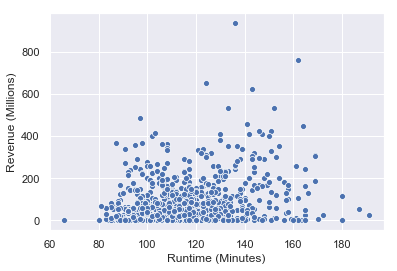

In [154]:
sns.scatterplot(x="Runtime (Minutes)", y="Revenue (Millions)", data=imdb)

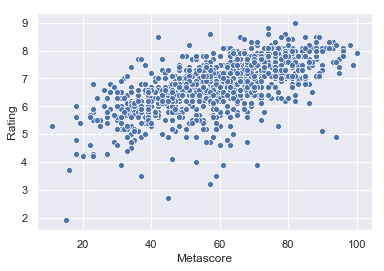

In [156]:
sns.scatterplot(x="Metascore", y="Rating", data=imdb)

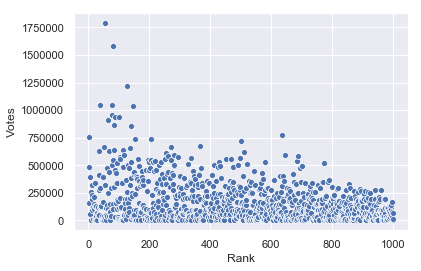

In [159]:
sns.scatterplot(x="Rank", y="Votes", data=imdb)

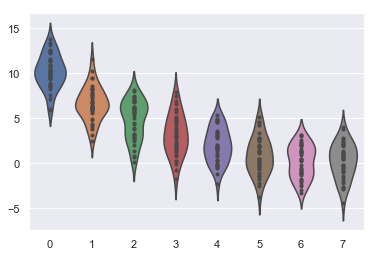

In [140]:
sns.set()

# Create a random dataset across several variables
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10


# Show each distribution with both violins and points
sns.violinplot(data=d, inner="points")

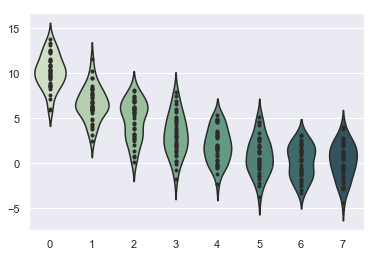

In [141]:
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
# Show each distribution with both violins and points
sns.violinplot(data=d, palette=pal, inner="points")

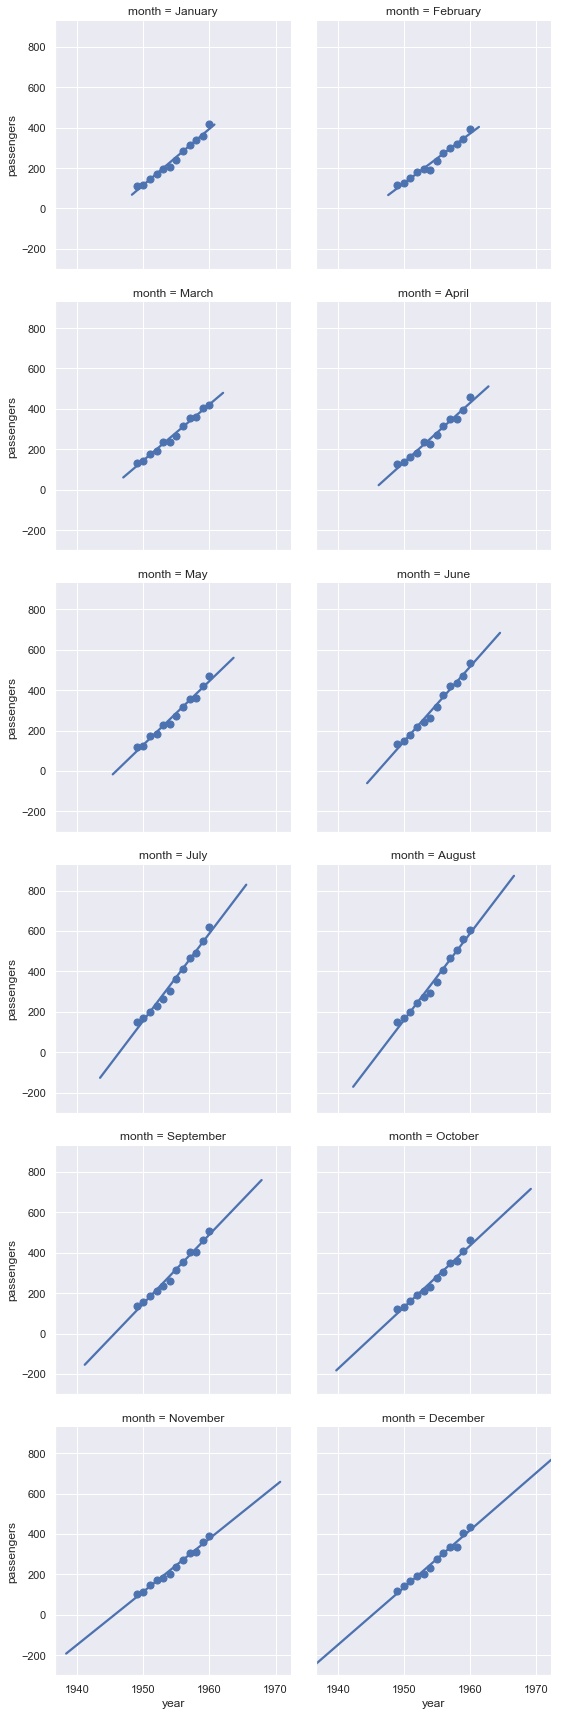

In [163]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="year", y="passengers", col="month", data=flights,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})